# Práctica 2: Aprendizaje automático

__Fecha de entrega: 27 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: XX__

__Nombres de los estudiantes: Pablo Heredero García y Javier Jiménez Arenas__

# Apartado 2: Clasificación

In [ ]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene dolor lumbar o no.

Las variables del conjunto de datos son las siguientes: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope.

Crea un dataframe a partir del fichero `lower_back_pain_dataset2.csv` que se proporciona junto con la práctica.



In [ ]:
!pip3 install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 84.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Cuarto/IA_II/lower_back_pain_dataset2.csv', index_col = 0)
df

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
pelvic_incidence,,,,,,,,,,,,
63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables con la variable `Class_att`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las variables numéricas con mayor correlación con la variable `Class_att`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. ¿Hay pares de variables que separen bien las clases?

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

Primeramente vamos a obtener los datos absolutos de dolor lumbar, para poder concluir si ambas clases (tiene dolor / no tiene dolor) están equilibradas:

In [ ]:
df['Class_att'].value_counts()

Class_att
Abnormal    210
Normal      100
Name: count, dtype: int64

Por lo que se puede ver, de entre todo el conjunto de pacientes, 210 presentan dolor lumbar y 100 no. Son por tanto dos clases razonablemente equilibradas, y podremos trabajar bien con este conjunto de datos.   
Es importante que las clases que vamos a estudiar estén equilibradas ya que de no estarlo, la tasa de aciertos puede presentar problemas. Por ejemplo, si el dolor lumbar sólo afectase a un 1% de los pacientes estudiados, un (mal) clasificador que siempre dé resultado negativo acertará el 99% de las ocasiones, pero no nos sería nada útil a la hora de hacer un diagnóstico.

A continuación vamos a evaluar la correlación que existe entre la variable Class_att (que marca la presencia/ausencia de dolor lumbar) y el resto de variables estudiadas:

In [ ]:
df['Class_att_bin'] = (df['Class_att'] == 'Abnormal') #Transformamos la variable Class_att en booleana para poder operar con ella

df1 = df.drop(['Class_att'], axis=1)
df1.corr()['Class_att_bin']

pelvic_tilt                 0.326063
lumbar_lordosis_angle       0.312484
sacral_slope                0.210602
pelvic_radius              -0.309857
degree_spondylolisthesis    0.443687
pelvic_slope                0.055865
Direct_tilt                -0.039591
thoracic_slope             -0.049354
cervical_tilt               0.100044
sacrum_angle                0.026887
scoliosis_slope            -0.069315
Class_att_bin               1.000000
Name: Class_att_bin, dtype: float64

Como se puede ver, las variables que presentan unos mayores coedifientes de correlación son pelvic_tilt, lumbar_lordosis_angle, degree_spondylolisthesis. Esto nos hace pensar que el dolor lumbar puede estar directamente relacionado con los valores de inclinación pélvica, el ángulo de la lordosis lumbar o el grado de espondilolistesis del paciente.  
De ahora en adelante operaremos con estas tres variables, pues parecen ser las más significativas en nuestro diagnóstico.

Mostramos ahora los rangos y estadísticos descriptivos de dichas variables:

In [ ]:
df[['pelvic_tilt','lumbar_lordosis_angle','degree_spondylolisthesis']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


Para tener una mejor comprensión de los datos que estamos manejando, representamos gráficamente las densidades por rangos de valor para cada variable:

<Axes: >

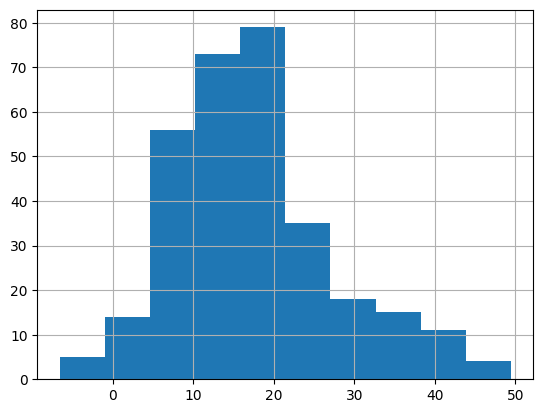

In [ ]:
df['pelvic_tilt'].hist()

<Axes: >

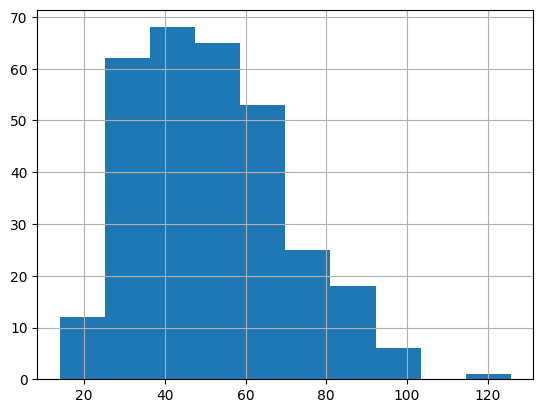

In [ ]:
df['lumbar_lordosis_angle'].hist()

<Axes: >

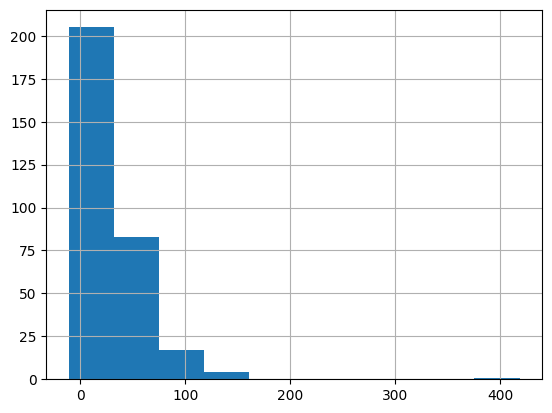

In [ ]:
df['degree_spondylolisthesis'].hist()

Tras un primer análisis de los datos, vamos a intentar establecer alguna nueva relación entre las variables que estamos estudiando. Para ello mostraremos los diagramas de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. El color rojo corresponderá con la presencia de dolor lumbar, y el azul con su ausencia.

<Axes: xlabel='pelvic_tilt', ylabel='lumbar_lordosis_angle'>

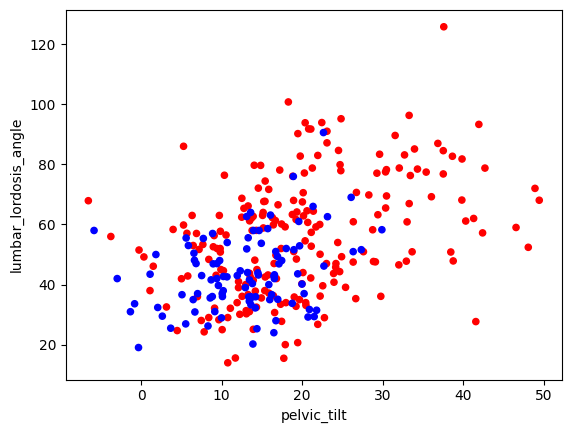

In [ ]:
dic_colors = {'Abnormal':'red', 'Normal':'blue'}
colors = df['Class_att'].map(dic_colors)

df.plot.scatter(x = 'pelvic_tilt', y='lumbar_lordosis_angle',c=colors)

<Axes: xlabel='pelvic_tilt', ylabel='degree_spondylolisthesis'>

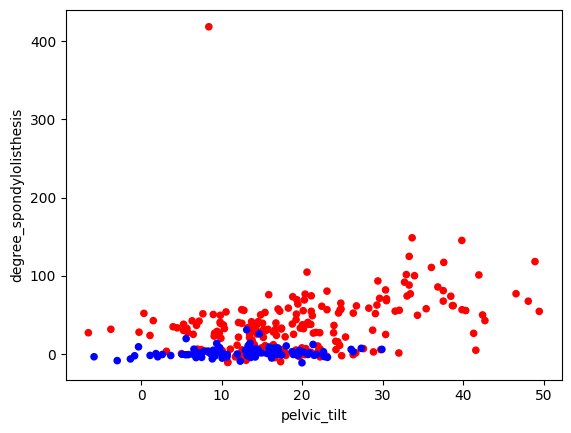

In [ ]:
df.plot.scatter(x = 'pelvic_tilt', y='degree_spondylolisthesis',c=colors)

<Axes: xlabel='lumbar_lordosis_angle', ylabel='degree_spondylolisthesis'>

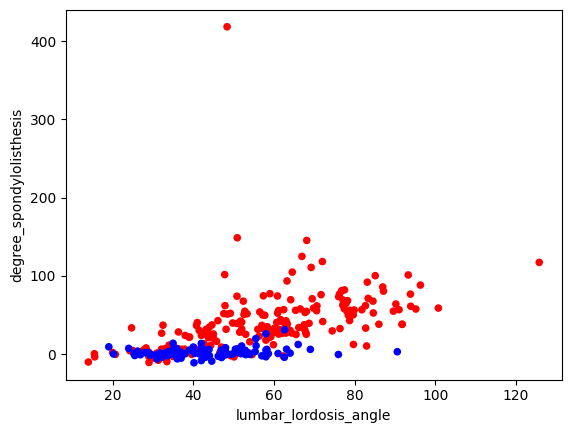

In [ ]:
df.plot.scatter(x ='lumbar_lordosis_angle', y='degree_spondylolisthesis',c=colors)

Finalmente mostramos la matriz de dispersión con todos los gráficos reunidos:

array([[<Axes: xlabel='pelvic_tilt', ylabel='pelvic_tilt'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='pelvic_tilt'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_tilt'>],
       [<Axes: xlabel='pelvic_tilt', ylabel='lumbar_lordosis_angle'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='lumbar_lordosis_angle'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='lumbar_lordosis_angle'>],
       [<Axes: xlabel='pelvic_tilt', ylabel='degree_spondylolisthesis'>,
        <Axes: xlabel='lumbar_lordosis_angle', ylabel='degree_spondylolisthesis'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='degree_spondylolisthesis'>]],
      dtype=object)

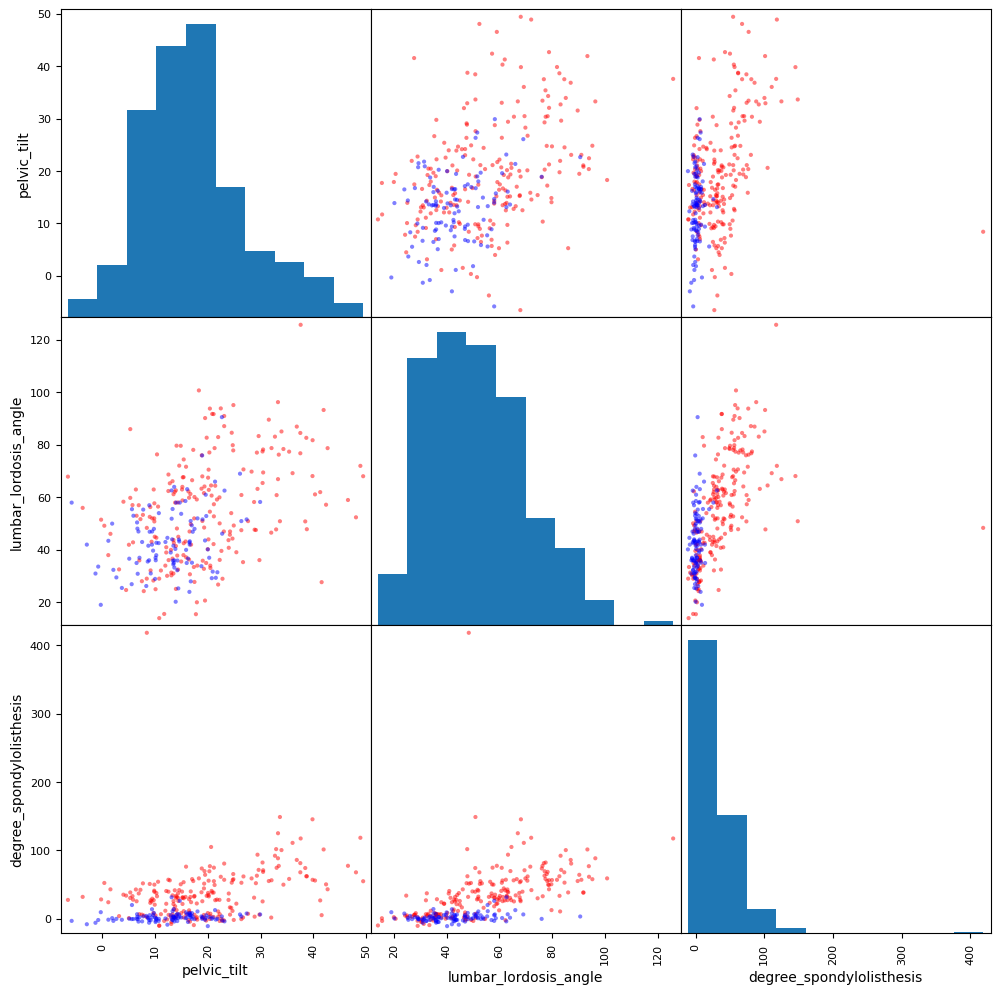

In [ ]:
from pandas.plotting import scatter_matrix
%matplotlib inline

scatter_matrix(df[['pelvic_tilt','lumbar_lordosis_angle','degree_spondylolisthesis']], figsize = (12,12), diagonal = 'hist', color = colors)

En vista de los resultados gráficos, es difícil sacar alguna conclusión fiable sobre la correlación entre las variables estudiadas y el dolor lumbar. Los elementos del conjunto de datos están bastante mezclados, aunque sí que se puede intuir que aquellos pacientes que no presentan dolor están todos en un rango de valores más o menos compacto, mientras que los pacientes con dolor lumbar es habitual que tengan valores más extremos. Sin embargo son todo intuiciones aproximadas, y no hay ningun par de variables que separe claramente las clases.

Parece por tanto un problema difícil de resolver en un primer análisis. Por ello utilizaremos a continuación técnicas de clasificación más sofisticadas como los árboles de decisión o los clasificadores K-NN o MLP

## 3) Árboles de decisión

Aplica árboles de decisión para resolver el problema



### 3.1) Normalización de los datos

Decide razonadamente si es necesario escalar o estandarizar los datos.

Puesto que vamos a trabajar con árboles de decisión para clasificar nuestros datos, no es necesario reescalarlos ni normalizarlos. Para el caso del algoritmo K-NN o el MLP, sí tendremos que reescalarlos.

### 3.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes.

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

A continuación importamos todos los paquetes y librerías necesarios para construir árboles de decisión. Construiremos una sucesión de árboles de decisión, cada uno con un valor de profundidad entre 1 y 30, y para cada uno recogeremos los valores de rendimiento en la clasificación para las fases de entrenamiento y validación. Realizaremos validación cruzada en 10 partes, y como índice del rendimiento de la clasificación tomaremos la tasa de acierto. Para la selección de variables utilizaremos la entropía como criterio.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np

train_accuracy = []
test_accuracy = []

df = pd.read_csv('/content/drive/MyDrive/Cuarto/IA_II/lower_back_pain_dataset2.csv', index_col = 0)
target = (df['Class_att'] == 'Abnormal')
data = df.drop(['Class_att'], axis=1)

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1,30)
for md in max_depths:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2)#Hallamos el árbol de decisión para cada profundidad máxima
    scores = cross_validate(clf, data, target, scoring='accuracy', cv=10, return_train_score=True) #Validación cruzada en 10 partes

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

train_accuracy, test_accuracy

([0.778494623655914,
  0.8179211469534049,
  0.8616487455197133,
  0.9053763440860214,
  0.9232974910394265,
  0.9469534050179214,
  0.9637992831541219,
  0.9706093189964158,
  0.9802867383512546,
  0.9885304659498209,
  0.9928315412186379,
  0.996415770609319,
  0.9996415770609319,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.7709677419354839,
  0.6548387096774194,
  0.7225806451612904,
  0.7516129032258064,
  0.7774193548387097,
  0.7645161290322581,
  0.7419354838709677,
  0.7193548387096774,
  0.7225806451612903,
  0.7387096774193549,
  0.7483870967741936,
  0.7548387096774193,
  0.7290322580645161,
  0.7419354838709677,
  0.7322580645161291,
  0.7354838709677419,
  0.732258064516129,
  0.7354838709677419,
  0.7516129032258065,
  0.7548387096774194,
  0.7387096774193548,
  0.7354838709677419,
  0.7354838709677419,
  0.7451612903225806,
  0.7548387096774194,
  0.7451612903225806,
  0.7387096774193549,
  0.745161

Una vez producidos los datos de rendimiento, los representamos en la curva de aprendizaje:

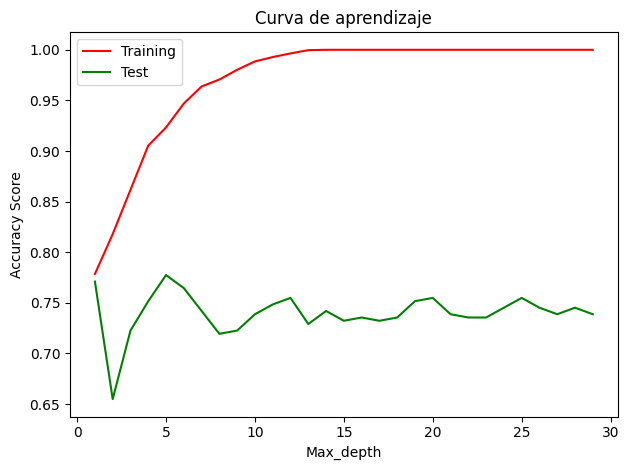

In [ ]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Max_depth"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Como se puede apreciar, hasta aproximadamente max_depth=5 los valores de aprendizaje tanto en entrenamiento como en test mejoran mucho y rápidamente. Sin embargo a partir de esa profundidad la métrica mejora ligeramente para el conjunto de entrenamiento y disminuye para el conjunto de test. En algunos casos mejora levemente, en otros empeora, pero en ningún caso vuelve a alcanzar el máximo. Esto puede indicar que el clasificador a partir de ese momento empieza a sobre-entrenar y generaliza peor.

Ahora vamos a repetir el procedimiento anterior, pero esta vez tomaremos como índice del rendimiento del aprendizaje la media armónica de precisión y exhaustividad (F1 Score).

In [ ]:
train_accuracy = []
test_accuracy = []

df = pd.read_csv('/content/drive/MyDrive/Cuarto/IA_II/lower_back_pain_dataset2.csv', index_col = 0)
target = (df['Class_att'] == 'Abnormal')
data = df.drop(['Class_att'], axis=1)

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1,30)
for md in max_depths:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2)
    scores = cross_validate(clf, data, target, scoring='f1', cv=10, return_train_score=True)

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

train_accuracy, test_accuracy

([0.805910656874876,
  0.8693869434015621,
  0.8984608881742094,
  0.9310911534209572,
  0.9450199176251877,
  0.9619053831069746,
  0.9739639704801256,
  0.9783426415566234,
  0.9850004419022241,
  0.9915645544234934,
  0.9952068524540417,
  0.997625208719365,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.7005981416957028,
  0.6504241618182414,
  0.7505302559943374,
  0.7771015002645384,
  0.8105321228549505,
  0.7871902220696402,
  0.7882003171104393,
  0.7634807744061144,
  0.7691787439613526,
  0.7741310126435984,
  0.7847711523433943,
  0.7889950025850248,
  0.7929055347381068,
  0.7880290519926515,
  0.7776829369706334,
  0.7608846206576558,
  0.7819779786199881,
  0.7797519313684151,
  0.7736271616320576,
  0.7788980841937411,
  0.7794336932400424,
  0.7560905881558055,
  0.7906749335611613,
  0.7939154979858033,
  0.7891223915395118,
  0.7709050369919934,
  0.775833899772759,
  0.7857447334210145,
  0

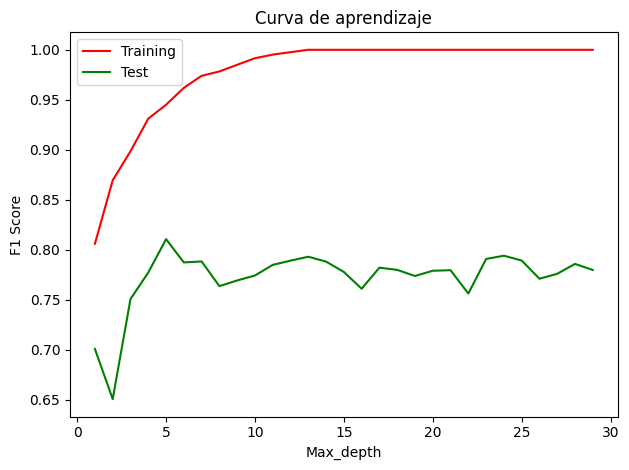

In [ ]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Max_depth"), plt.ylabel("F1 Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### 3.3) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles).

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden?
- ¿Hay variables del conjunto de datos que no se han usado?
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?
- ¿El árbol que has calculado es capaz de separar las clases?
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.


A continuación calculamos el árbol de decisión con una profundidad máxima de 5 (que como hemos visto en el apartado anterior, es la óptima), y lo representamos gráficamente.

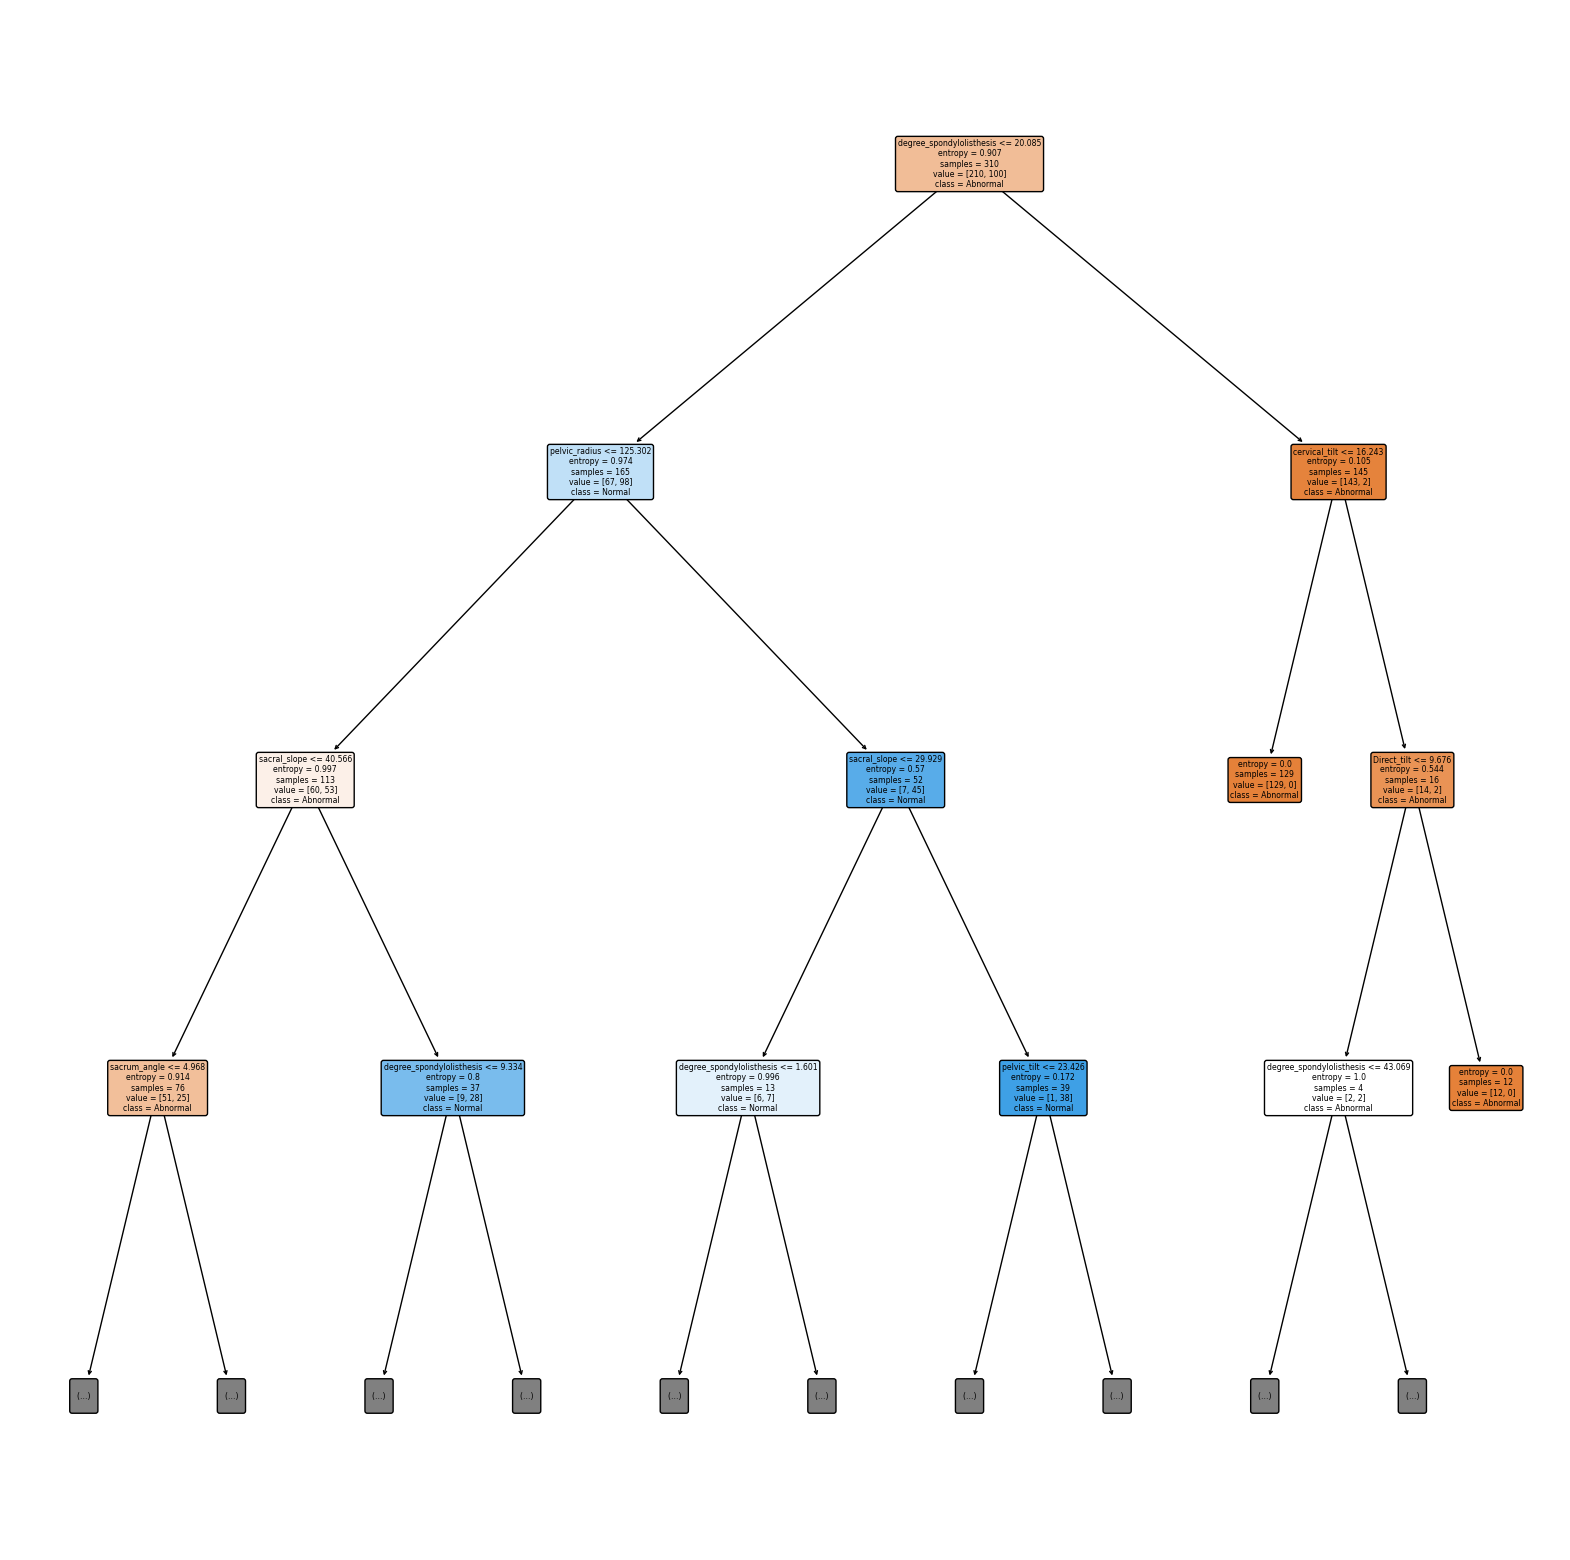

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cuarto/IA_II/lower_back_pain_dataset2.csv', index_col = 0)
target = df['Class_att']
data = df.drop(columns = ['Class_att'])

#Calculamos el árbol de decisión:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2)
clf = clf.fit(data, target)

#Representamos gráficamente el árbol:
plt.figure(figsize=(20,20))
plot_tree(clf, filled=True, max_depth=3, feature_names=data.columns, class_names=target.unique().astype('str'), rounded=True) #Mostramos solo hasta profundidad 3, si no es imposible leer las etiquetas
plt.show()

<Axes: >

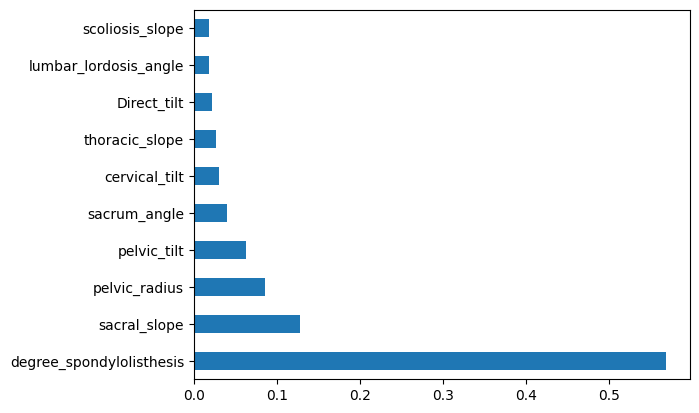

In [ ]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(clf.feature_importances_, index=data.columns)
feat_importances.nlargest(10).plot(kind='barh')

- ¿Cuáles son las variables más importantes y en qué orden?  
Tal y como se puede ver en este último gráfico, las variables más importantes son degree_spondylolisthesis (con mucha diferencia la que más), sacral_slope, pelvic_radius y pelvic_tilt.

- ¿Hay variables del conjunto de datos que no se han usado?  
Por lo que podemos ver en el árbol hasta la profundidad que es visible, sólo se han usado las variables que más importancia tienen (las de la cuestión anterior), las demás no aparecen. Quizás más adelante en el árbol, si pudiéramos verlo completo, veríamos aparecer algunas de ellas, pero en un principio no resultan útiles en la clasificación.

- ¿Cuál sería la tasa de aciertos (accuracy) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?  
Con una sola pregunta, la tasa de acierto sería de (98 (verdaderos negativos)+ 143 (verdaderos positivos)) / 310 (total) = 0.7774 => 77.74% de acierto.

- ¿El árbol que has calculado es capaz de separar las clases?
 Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?  
 Con la profundidad máxima que hemos impuesto, sólo se llegan a ver dos separaciones completas de clase, y ambas corresponden con grupo "Abnormal". Para discriminarla se han utilizado las variables degree_spondylolisthesis, cervical_tilt y direct_tilt.

- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?  
Si tomamos la entropía como la medida del desorden (confusión) en los datos que se van analizando, podemos ver que el nodo de más a la izquierda, con un valor de entropía de 0.997, es el que más confusión presenta.

## 3.4) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

A continuación generamos el árbol de decisión con profundidad 5, y recogemos las métricas de precisión, exhaustividad y valor F1 agregadas:

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']
df = pd.read_csv('/content/drive/MyDrive/Cuarto/IA_II/lower_back_pain_dataset2.csv', index_col = 0)
target = (df['Class_att'] == 'Abnormal')
data = df.drop(columns = ['Class_att'])

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, data, target, scoring=scoring_metrics,
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.798170029806702
Exhaustividad ponderada media:  0.7806451612903226
F1 ponderado media:  0.7654181929408711


En función de los valores anteriores, que son los tres métricas del rendimiento de nuestro algoritmo de clasificación para estos datos, podemos decir que es razonablemente bueno. Tanto la exhaustividad como la precisión y la media armónica de precision y exhaustividad (F1 Score) están alrededor del 75-78%. Esto quiere decir que su tasa de acierto en general es razonablemente buena, pero no podríamos calificarla mejor ya que alrededor de un 25% de las veces fallará en su diagnóstico.

Calcula a continuación el informe detallado para cada una de las clases:

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

df = pd.read_csv('/content/drive/MyDrive/Cuarto/IA_II/lower_back_pain_dataset2.csv', index_col = 0)
target = df['Class_att']
data = df.drop(columns = ['Class_att'])

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2)
predictions = cross_val_predict(clf, data, target, cv=10)

# Informe por clases
cr = classification_report(target,predictions, target_names=target.unique().astype('str'))
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.83      0.84      0.84       210
      Normal       0.66      0.64      0.65       100

    accuracy                           0.78       310
   macro avg       0.75      0.74      0.74       310
weighted avg       0.78      0.78      0.78       310



En el caso de la clase "Abnormal", que corresponde con los pacientes que presentan dolor lumbar, los valores de precisión, exhaustividad (recall) y media armónica (f1-score) son bastante buenos, todos ellos alrededor del 83%.  
Sin embargo, para la clase "Normal", que corresponde con los pacientes que no presentan dolor lumbar, los valores son sensiblemente peores, todos ellos alrededor de un 65%. Esto puede deberse a que en el conjunto inicial de datos, los pacientes que presentaban dolor lumbar (clase "Abnormal") suponían más del doble que los que no, y este hecho ha podido alterar el resultado del algoritmo en este sentido.  
La tasa de acierto se encuentra en un 77%, que es un valor razonablemente bueno, aunque en ningún caso óptimo, sobre todo tratándose de diagnósticos médicos.

A continuación dibujamos la matriz de confusión para los datos resultantes del algoritmo de clasificación:

In [ ]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[177  33]
 [ 37  63]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

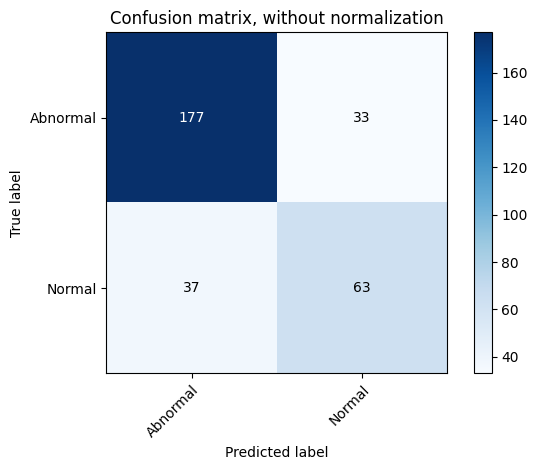

In [ ]:
plot_confusion_matrix(target, predictions, target.unique().astype('str'), normalize=False)

Como se puede ver, el número de diagnósticos verdaderos es notablemente mayor que los falsos:
- 177 diagnósticos de dolor lumbar verdaderos
- 37 diagnósticos de dolor lumbar falsos
- 63 diagnósticos de ausencia de dolor lumbar verdaderos
- 33 diagnósticos de ausencia de dolor lumbar falsos  

En base a estos datos se puede calcular de nuevo la precisión en el diagnóstico, que como hemos dicho anteriormente está en un 77%.

En base a todo este análisis, podemos concluir que nustro clasificador no funciona mal, ya que en un 77% de las ocasiones proporcionará un diagnóstico correcto, pero no podemos decir que sea un clasificador realmente bueno. Un 77% de efectividad en el diagnóstico deja un 23% de conclusiones erróneas, que tratándose de diagnósticos médicos, pueden tener repercusiones muy graves. Este ejemplo sirve para ilustrar la dificultad de estos problemas, sobre todo cuando se trata de asuntos tan sensibles al error como la salud de los pacientes.

## 4) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

Antes de ìntroducir los datos en el algoritmo de clasificación K-NN, es siempre conveniente reescalar los datos para un mejor funcionamiento del clasificador cuando nuestras variables presentan escalas tan dispares (como es nuestro caso). Por tanto a continuación vamos a reescalar los datos de las variables originales en función de sus valores máximo y mínimo (MinMaxScaler):

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

df_1 = df.drop(columns = ['Class_att'])

# Fase de ajuste
minmax_scaler.fit(df_1)

# Fase de transformación
df_mm = minmax_scaler.transform(df_1)

df_mm

array([[0.51989984, 0.22917997, 0.2508573 , ..., 0.84511485, 0.15686136,
        0.9777973 ],
       [0.2967831 , 0.09857833, 0.14462935, ..., 0.99630049, 0.2308778 ,
        0.24381182],
       [0.51393229, 0.32299466, 0.30766054, ..., 0.98344208, 0.14802577,
        0.32716636],
       ...,
       [0.52244298, 0.28789745, 0.23490726, ..., 0.19050343, 0.91936458,
        0.30555027],
       [0.27235174, 0.24684569, 0.21462279, ..., 0.27870135, 0.97149127,
        0.71548189],
       [0.20770855, 0.20261992, 0.14251659, ..., 0.68420445, 0.87720937,
        0.89992045]])

Una vez tenemos nuestros datos reescalados, queremos hallar el valor óptimo de vecinos más cercanos usando validación cruzada con distintos valores de k. Para ello vamos a realizar 20 ejecuciones del algoritmo de clasificación K-NN, cada una para un valor distinto de K (entre 1 y 20). Para la validación cruzada se utilizarán 10 subconjuntos. En cada ejecución guardaremos también la precisión media y la desviación típica en la precisión, para después poderlo representar gráficamente.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,30)
for k in k_values:
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, df_mm, df['Class_att'], scoring='accuracy', cv=10)

    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.5935483870967742,
 0.5935483870967742,
 0.6387096774193549,
 0.6225806451612903,
 0.6483870967741936,
 0.6387096774193549,
 0.6903225806451613,
 0.6774193548387097,
 0.6967741935483871,
 0.6935483870967742,
 0.7000000000000001,
 0.6806451612903226,
 0.7129032258064517,
 0.703225806451613,
 0.7032258064516129,
 0.7064516129032259,
 0.7161290322580646,
 0.7000000000000001,
 0.7064516129032259,
 0.7064516129032259,
 0.7064516129032259,
 0.7064516129032258,
 0.703225806451613,
 0.6967741935483871,
 0.7064516129032259,
 0.7064516129032258,
 0.7000000000000001,
 0.6935483870967742,
 0.6870967741935484]

Una vez tenemos los datos de precisión para cada k producidos por el algoritmo, vamos a representarlos gráficamente para así poder distinguir qué valor del parámetro k es el óptimo para este caso:

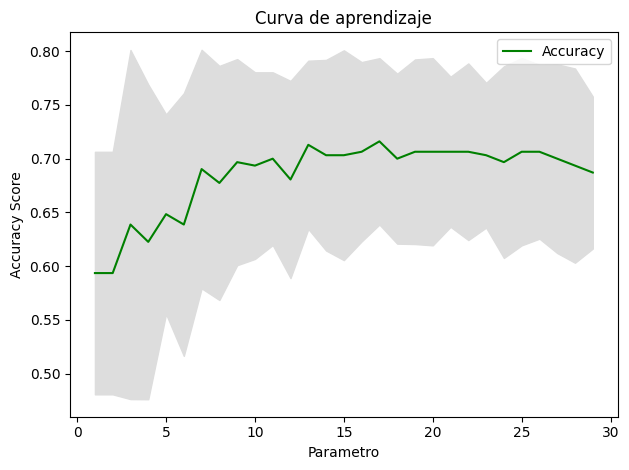

In [ ]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En esta gráfica se puede ver el valor de precisión en color verde y el sombreado gris corresponde con los valores de precisión media +/- la desviación típica en la precisión.
En función de lo que podemos ver en esta curva de aprendizaje, el valor máximo de precisión (media) se alcanza para K = 17, aproximadamente. Hasta ese punto el clasificador mejora su precisión notablemente alcanzando su máximo, y de ahí en adelante no vuelve a aumentar significativamente, sino todo lo contrario. Este diagrama nos transmite la idea de que para valores superiores a 17 el clasificador no mejora su rendimiento, sino que empieza a sobreaprender.

Puesto que para K=17 hemos visto que la clasificación es óptima, a continuación ejecutamos el algoritmo de K-NN para K=17, y poder así analizar los resultados:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Como la proporción de clases a predecir está desbalanceada (2/3 y 1/3) es importante
# usar la versión estratificada que mantiene la proporción de elementos de cada clase
# al hacer la partición
# En este caso usamos el 80% de instancias como conjunto de entrenamiento y el 20% como
# conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(df_mm, df['Class_att'],
                                                    test_size=0.20, stratify=df['Class_att'])

# Creamos el clasificador k-NN
# Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
clf = KNeighborsClassifier(n_neighbors=17, weights='distance')

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Medir la tasa de aciertos o exactitud (accuracy) en los conjuntos de entrenamiento y test
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

train_accuracy, test_accuracy

(1.0, 0.7258064516129032)

Como podemos ver en los resultados de precisión, en el caso de la fase de entrenamiento alcanza un 100% de precisión, mientras que en la fase de test consigue más de un 70%.  
Para una mejor comprensión de los resultados obtenidos, los representamos a través de la matriz de confusión. En este caso vamos a utilizar los valores normalizados para así poder manejar porcentajes de precisión:

In [ ]:
from sklearn.metrics import confusion_matrix

y_test_predicted =clf.predict(X_test)

confusion_matrix(y_test, y_test_predicted)

array([[38,  4],
       [13,  7]])

In [ ]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Normalized confusion matrix
[[0.9047619 0.0952381]
 [0.65      0.35     ]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

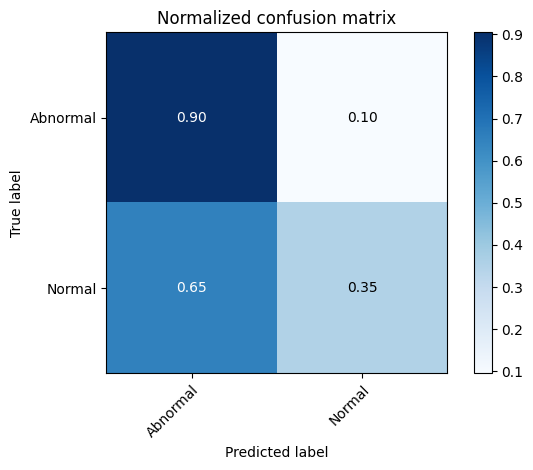

In [ ]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plot_confusion_matrix(y_test, y_test_predicted, ['Abnormal', 'Normal'], normalize=True)

Tal y como se puede ver en la anterior matriz, un 90% de los diagnósticos de dolor lumbar y un 35% de los diagnósticos de ausencia del mismo fueron correctos. Salta a la vista el dato de que un 65% de los diagnósticos de "Abnormal" fueron incorrectos. Esto sin duda supone un problema para nuestro clasificador.

A continuación vamos a realizar una validación cruzada en 10 partes para así obtener métricas sobre el comportamiento del clasificador mucho más representativas de su funcionamiento real.

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np

# Creamos el clasificador k-NN
clf = KNeighborsClassifier(n_neighbors=17, weights='distance')

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
# cross_validate usa validación estratificada para problemas de clasificación binaria o multiclase
scores = cross_validate(clf, df_mm, df['Class_att'], scoring='accuracy',
                        cv=10, return_train_score=False)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
scores

{'fit_time': array([0.00542235, 0.00417757, 0.00187182, 0.00180626, 0.00184393,
        0.00181794, 0.00227427, 0.00227284, 0.0018189 , 0.00192308]),
 'score_time': array([0.00327873, 0.00267076, 0.00257802, 0.00615454, 0.00251079,
        0.00249434, 0.00462365, 0.00282192, 0.00274229, 0.00242376]),
 'test_score': array([0.61290323, 0.58064516, 0.80645161, 0.77419355, 0.64516129,
        0.74193548, 0.77419355, 0.74193548, 0.67741935, 0.80645161])}

In [ ]:
print('Accuracy mean:', np.mean(scores['test_score']))
print('Accuracy std:', np.std(scores['test_score']))

Accuracy mean: 0.7161290322580646
Accuracy std: 0.07741935483870965


Tal y como nos muestran estos dos últimos valores, la precisión media se encuentra alrededor del 70% y la desviación típica por debajo del 10%. A simple vista son valores razonablemente buenos, aunque como hemos podido ver en la matriz de confusión, este clasificador presenta serias dificultades a la hora de hacer una clasificación correcta como "Normal" (ausencia de dolor lumbar).

Para tener una información más precisa sobre el desempeño de nuestro clasificador, vamos a calcular los valores de precisión (precision), exahustividad (recall) y la medida F1 (F1 score) para cada una de las clases, además de los valores agregados.

A contincuación calculamos los valores agregados haciendo una media ponderada de los valores de cada clase según el número de instancias de cada clase:

In [ ]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=17 sobre los datos re-escalados
clf = KNeighborsClassifier(17, weights='distance')

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, df_mm, df['Class_att'], scoring=scoring_metrics,
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos,
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([0.00427485, 0.00234222, 0.00192785, 0.00402737, 0.00202918,
        0.00190926, 0.00216508, 0.00218391, 0.00191641, 0.00192904]),
 'score_time': array([0.01556611, 0.00978541, 0.00869155, 0.01000285, 0.00906324,
        0.00854635, 0.0106461 , 0.00981474, 0.00842738, 0.00895095]),
 'test_precision_weighted': array([0.65627541, 0.56940371, 0.81075269, 0.83064516, 0.59801489,
        0.8131257 , 0.77915633, 0.72989247, 0.63799283, 0.84946237]),
 'test_recall_weighted': array([0.61290323, 0.58064516, 0.80645161, 0.77419355, 0.64516129,
        0.74193548, 0.77419355, 0.74193548, 0.67741935, 0.80645161]),
 'test_f1_weighted': array([0.62478778, 0.57448573, 0.79067321, 0.72952854, 0.6048959 ,
        0.67655914, 0.74857012, 0.72089762, 0.62845622, 0.77707373])}

In [ ]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.7274721558767231
Exhaustividad ponderada media:  0.7161290322580646
F1 ponderado media:  0.6875927985838788


Como podemos ver, los tres valores resultantes de precisión, exhaustividad y medida F1 están alrededor del 70%, con resultados muy similares al de precisión que hemos calculado anteriormente, por lo que no nos aportan mucha más información.

Por tanto, para tener una visión más detallada del rendimiento del clasificador a nivel de cada clase, calculamos la precisión, exahustividad y medida F1 de cada una de las clases por separado:

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = KNeighborsClassifier(17, weights='distance')
predictions = cross_val_predict(clf, df_mm, df['Class_att'], cv=10)

# Informe por clases
cr = classification_report(df['Class_att'], predictions, target_names=df['Class_att'].unique().astype('str'))
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.74      0.89      0.81       210
      Normal       0.60      0.35      0.44       100

    accuracy                           0.72       310
   macro avg       0.67      0.62      0.63       310
weighted avg       0.70      0.72      0.69       310



Estos últimos resultados arrojan información más detallada e interesante, ya que podemos apreciar una sensible diferencia entre los valores para una y otra clase. Los resultados de precisión, exhaustividad, y media armónica (F1-Score) para la clase "Abnormal" (que corresponde con presencia de dolor lumbar) son todos bastante buenos, entre un 75% y un 90%. Sin embargo, las mismas métricas para la clase "Normal" presentan resultados notablemente más bajos, entre un 35% y un 60%. Estos datos vienen a confirmar el hecho que veníamos observando en los apartados anteriores, y es que el desempeño del clasificador es sensiblemente mejor a la hora de clasificar a pacientes con dolor lumbar frente a los que no.

En términos generales no es un mal clasificador, pero de igual manera que dijimos en el apartado 4, no se puede decir que sea uno bueno ya que no alcanza niveles de precisión suficientemente altos como para ser fiable. Mucho más si consideramos que estamos hablando de un tema de salud, que suele resultar mucho más sensible que otros.

## 5) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


En este apartado vamos a utilizar una red neuronal de tipo perceptrón multicapa para clasificar nuestros datos de pacientes.  
Tal y como hemos visto ya en los demás apartados, los datos originales presentan escalas muy dispares y con magnitudes muy diferentes. Es por tanto conveniente reescalar los datos para que al utilizar redes neuronales con ellos, los resultados sean correctos.   
Vamos a continuación a reescalar los datos en función de sus valores máximo y mínimo (MinMaxScaler):

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()
scaler.fit(df.drop(columns = ['Class_att']))
df_mm = scaler.transform(df.drop(columns = ['Class_att']))
df_mm

array([[0.51989984, 0.22917997, 0.2508573 , ..., 0.84511485, 0.15686136,
        0.9777973 ],
       [0.2967831 , 0.09857833, 0.14462935, ..., 0.99630049, 0.2308778 ,
        0.24381182],
       [0.51393229, 0.32299466, 0.30766054, ..., 0.98344208, 0.14802577,
        0.32716636],
       ...,
       [0.52244298, 0.28789745, 0.23490726, ..., 0.19050343, 0.91936458,
        0.30555027],
       [0.27235174, 0.24684569, 0.21462279, ..., 0.27870135, 0.97149127,
        0.71548189],
       [0.20770855, 0.20261992, 0.14251659, ..., 0.68420445, 0.87720937,
        0.89992045]])

En nuestro caso, de todos los parámetros que podemos configurar en la red neuronal, sólo vamos optimizar el coeficiente de regularización.

Vamos a explorar una red con una capa oculta con 100 neuronas, función de activación ReLU, tamaño de mini-batch 100, tasa de aprendizaje 0.1, y máximo de 500 iteraciones a los datos (epochs). Realizaremos una sucesión de ejecuciones para valores incrementales del coeficiente de regularización, y en cada una guardaremos sus valores de precisión. Con esos datos a continuación podremos dibujar la curva de aprendizaje y poder así ver para qué valor del coeficiente de regularización se consigue el máximo de precisión en el clasificador.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

accuracy_mean = []
accuracy_std = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100,
             learning_rate_init=0.001, max_iter=500)

    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_validate(mlp, df_mm, df['Class_att'], scoring='accuracy', cv=10)

    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[0.7870967741935485,
 0.7903225806451613,
 0.7774193548387097,
 0.7645161290322581,
 0.7451612903225806,
 0.7290322580645162,
 0.7193548387096775,
 0.7225806451612903,
 0.7064516129032259,
 0.703225806451613]

Con estos resultados, a continuación representamos gráficamente la curva de aprendizaje:

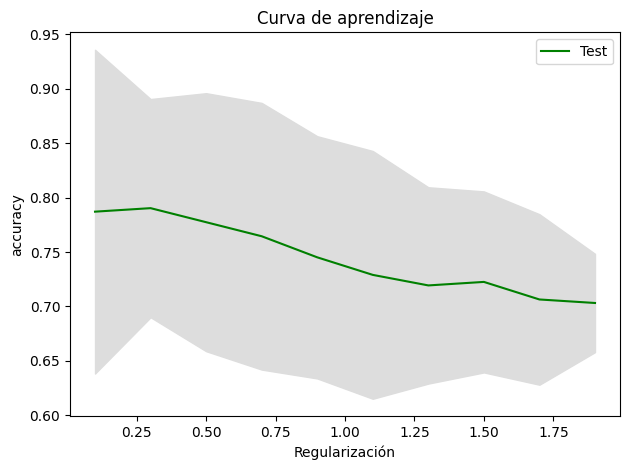

In [ ]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En vista de lo que podemos ver en la curva de aprendizaje, podemos obsevar un comportamiento bastante estable para este parámetro en el rango observado. Sin embargo, existe un punto de inflexión claro para un coeficiente de regularización de 0.25.

A continuación vamos a realizar una validación cruzada en 10 partes para así obtener métricas sobre el comportamiento del clasificador mucho más representativas de su funcionamiento real.

In [ ]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.25, batch_size=100,
             learning_rate_init=0.001, max_iter=500)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, df_mm, df['Class_att'], scoring=scoring_metrics,
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos,
# entre ellos los resultados de las métricas elegidas en el test
scores

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

{'fit_time': array([1.56621385, 3.80999207, 4.17828417, 1.49030852, 1.29450917,
        1.03020191, 1.22275305, 1.24108672, 1.27049232, 1.30400014]),
 'score_time': array([0.00908232, 0.04523349, 0.00830221, 0.02483678, 0.00778461,
        0.0074811 , 0.00746989, 0.0074482 , 0.00996518, 0.00773668]),
 'test_precision_weighted': array([0.71657017, 0.63709677, 0.87903226, 0.72989247, 0.84101382,
        0.91532258, 0.94109397, 0.8916129 , 0.84101382, 0.87131837]),
 'test_recall_weighted': array([0.61290323, 0.58064516, 0.80645161, 0.74193548, 0.83870968,
        0.90322581, 0.93548387, 0.87096774, 0.83870968, 0.87096774]),
 'test_f1_weighted': array([0.62266197, 0.59424586, 0.81265509, 0.72089762, 0.82985452,
        0.89791271, 0.93336592, 0.86044881, 0.82985452, 0.86673183])}

In [ ]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8263967149415958
Exhaustividad ponderada media:  0.8
F1 ponderado media:  0.7968628847277474


Como podemos ver, los tres valores resultantes de precisión, exhaustividad y medida F1 están alrededor del 80%, lo cual indica que el clasificador tiene un desempeño bastante bueno.

Para tener una información más precisa sobre la calidad de nuestro clasificador, vamos a calcular los valores de precisión (precision), exahustividad (recall) y la medida F1 (F1 score) para cada una de las clases, además de los valores agregados.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.3, batch_size=100,
             learning_rate_init=0.001, max_iter=500)
predictions = cross_val_predict(clf, df_mm, df['Class_att'], cv=10)

# Informe por clases
cr = classification_report(df['Class_att'], predictions, target_names=df['Class_att'].unique().astype('str'))
print(cr)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

              precision    recall  f1-score   support

    Abnormal       0.84      0.87      0.85       210
      Normal       0.70      0.66      0.68       100

    accuracy                           0.80       310
   macro avg       0.77      0.76      0.77       310
weighted avg       0.80      0.80      0.80       310



Estos últimos resultados ofrecen información más detallada e interesante, ya que podemos apreciar una sensible diferencia entre los valores para una y otra clase. Los resultados de precisión, exhaustividad, y media armónica (F1-Score) para la clase "Abnormal" (que corresponde con presencia de dolor lumbar) son todos bastante buenos, entre un 84% y un 87%. Sin embargo, las mismas métricas para la clase "Normal" presentan resultados ligeramente más bajos, entre un 66% y un 70%. Estos datos nos indican que el desempeño del clasificador es ligeramente mejor a la hora de clasificar a pacientes con dolor lumbar frente a los que no.

En términos generales no es un mal clasificador, pero de igual manera que dijimos en los apartados anteriores, no se puede decir que sea uno bueno ya que no alcanza niveles de precisión suficientemente altos como para ser fiable. Mucho más si consideramos que estamos hablando de un tema de salud, que suele resultar mucho más sensible que otros. Aun así, este clasificador, que utiliza redes neuronales tipo perceptrón multicapa, es el que mejores resultados ha ofrecido de entre todos los que hemos desarrollado en esta práctica.